# Part 1: Modeling

#Python Coding and Data Set

In [1]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Load the seaborn libraries with alias 'sns' 
import seaborn as sns
# Load the matplotlib.pyplot libraries with alias 'plt' 
import matplotlib.pyplot as plt

# Read data from given file  
# data file has no column names hence it will be defaulted to numberical index starting from 0
# use header=None to take all the lines as data
data = pd.read_csv("breast-cancer.csv",header=None) 

# Read column names from given header file
headerFields = open("field_names.txt", 'r').read().split('\n')

In [2]:
# Preview the first 5 records of the dataframe
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# List the column names loaded to string array
print(headerFields)

['ID', 'diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst', 'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean', 'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error', 'area_worst', 'smoothness_mean', 'smoothness_sd_error', 'smoothness_worst', 'compactness_mean', 'compactness_sd_error', 'compactness_worst', 'concavity_mean', 'concavity_sd_error', 'concavity_worst', 'concave_points_mean', 'concave_points_sd_error', 'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error', 'symmetry_worst', 'fractal_dimension_mean', 'fractal_dimension_sd_error', 'fractal_dimension_worst']


In [4]:
#check is any null in given dataframe
data.isnull().values.any()

False

In [5]:
# Rename the defaulted coulmn names for the loaded dataframe to the coulmn names from string array
for i in range(0,32):
    data.rename(columns={i:headerFields[i]}, inplace = True)

In [6]:
# Replace diagnosis field value in to numerical value to find the correlation value with other fields. 
# 1 if value is 'M' (malignant) and 0 if value is 'B' (benign)
data['diagnosis'] = data.diagnosis.apply(lambda x: 1 if x == "M" else 0)
# Preview last 5 records of the data frame with renamed column names
data.tail()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [7]:
# Group the data frame on diagnosis field
groupedData = data.groupby("diagnosis")

In [8]:
# Calculate the mean on smoothness field for benign (0) and malignant (1) tumors 
print ("Mean for smoothness")
smoothnessMean = groupedData["smoothness_mean"].mean()
print(smoothnessMean)
# Calculate the mean on compactness field for benign (0) and malignant (1) tumors 
print ("Mean for compactness")
compactnessMean = groupedData["compactness_mean"].mean()
print(compactnessMean)

Mean for smoothness
diagnosis
0    2.000321
1    4.323929
Name: smoothness_mean, dtype: float64
Mean for compactness
diagnosis
0    0.021438
1    0.032281
Name: compactness_mean, dtype: float64


In [9]:
# Calculate the median of smoothness for benign (0) and malignant (1) tumors 
print ("Median for smoothness")
smoothnessMedian = groupedData["smoothness_mean"].median()
print(smoothnessMedian)
# Calculate the median of compactness for benign (0) and malignant (1) tumors 
print ("Median for compactness")
compactnessMedian = groupedData["compactness_mean"].median()
print(compactnessMedian)

Median for smoothness
diagnosis
0    1.8510
1    3.6795
Name: smoothness_mean, dtype: float64
Median for compactness
diagnosis
0    0.01631
1    0.02859
Name: compactness_mean, dtype: float64


From the above mean ans median calculation it is evident that vaule differs for benign and malignant tumors.
More difference are found for smoothness than compactness, hence smoothness field has high correlation with target outcome benign or malignant tumors. Mean and Median values are higher for malignant tumors compared to benign tumors.

#Exploratory Data Analysis

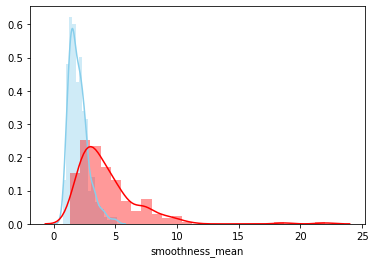

In [10]:
# Distribution graph for smoothness properties
# skyblue colour for benign tumor and red colour for malignant tumor
sns.distplot( data[data.diagnosis == 0]["smoothness_mean"] , color="skyblue")
sns.distplot( data[data.diagnosis == 1]["smoothness_mean"] , color="red")

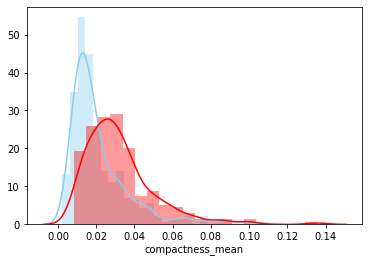

In [11]:
# Distribution graph for compactness properties
# skyblue colour for benign tumor and red colour for malignant tumor
sns.distplot( data[data.diagnosis == 0]["compactness_mean"] , color="skyblue")
sns.distplot( data[data.diagnosis == 1]["compactness_mean"] , color="red")

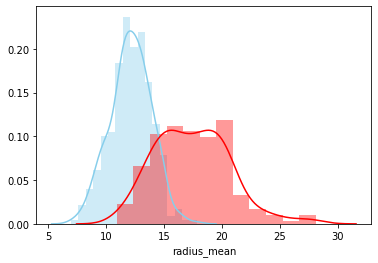

In [12]:
# Distribution graph for radius properties
# skyblue colour for benign tumor and red colour for malignant tumor
sns.distplot( data[data.diagnosis == 0]["radius_mean"] , color="skyblue")
sns.distplot( data[data.diagnosis == 1]["radius_mean"] , color="red")

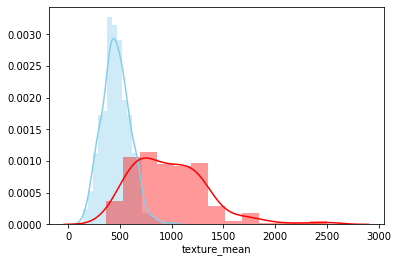

In [13]:
# Distribution graph for texture properties
# skyblue colour for benign tumor and red colour for malignant tumor
sns.distplot( data[data.diagnosis == 0]["texture_mean"] , color="skyblue")
sns.distplot( data[data.diagnosis == 1]["texture_mean"] , color="red")

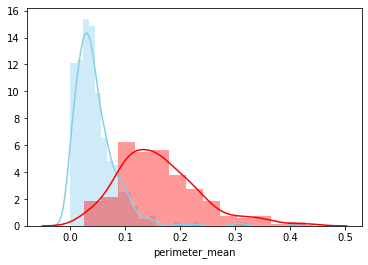

In [14]:
# Distribution graph for perimeter properties
# skyblue colour for benign tumor and red colour for malignant tumor
sns.distplot( data[data.diagnosis == 0]["perimeter_mean"] , color="skyblue")
sns.distplot( data[data.diagnosis == 1]["perimeter_mean"] , color="red")

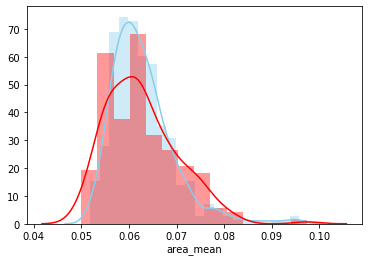

In [15]:
# Distribution graph for area properties
# skyblue colour for benign tumor and red colour for malignant tumor
sns.distplot( data[data.diagnosis == 0]["area_mean"] , color="skyblue")
sns.distplot( data[data.diagnosis == 1]["area_mean"] , color="red")

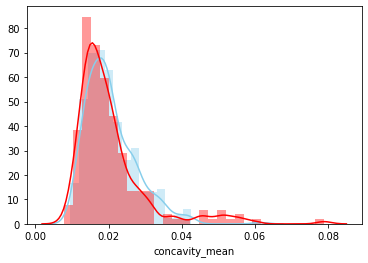

In [16]:
# Distribution graph for concavity properties
# skyblue colour for benign tumor and red colour for malignant tumor
sns.distplot( data[data.diagnosis == 0]["concavity_mean"] , color="skyblue")
sns.distplot( data[data.diagnosis == 1]["concavity_mean"] , color="red")

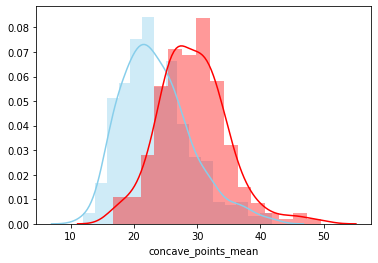

In [17]:
# Distribution graph for concave_points properties
# skyblue colour for benign tumor and red colour for malignant tumor
sns.distplot( data[data.diagnosis == 0]["concave_points_mean"] , color="skyblue")
sns.distplot( data[data.diagnosis == 1]["concave_points_mean"] , color="red")

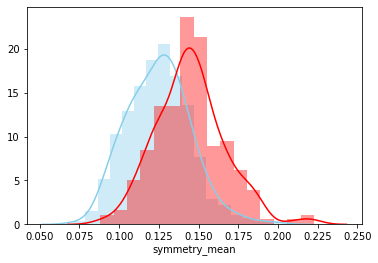

In [18]:
# Distribution graph for symmetry properties
# skyblue colour for benign tumor and red colour for malignant tumor
sns.distplot( data[data.diagnosis == 0]["symmetry_mean"] , color="skyblue")
sns.distplot( data[data.diagnosis == 1]["symmetry_mean"] , color="red")

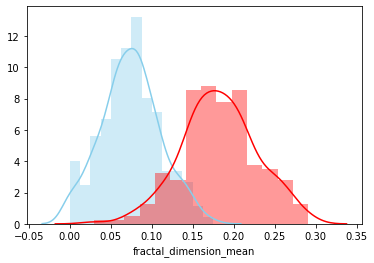

In [19]:
# Distribution graph for fractal_dimension properties
# skyblue colour for benign tumor and red colour for malignant tumor
sns.distplot( data[data.diagnosis == 0]["fractal_dimension_mean"] , color="skyblue")
sns.distplot( data[data.diagnosis == 1]["fractal_dimension_mean"] , color="red")

From the above distribution graph the following properties have direct correlation with malignant tumor;
1. radius_mean
2. texture_mean
3. smoothness_mean                  
4. perimeter_mean
5. fractal_dimension_mean

When the values are higher for the above properties the chance of malignant tumor is also high.

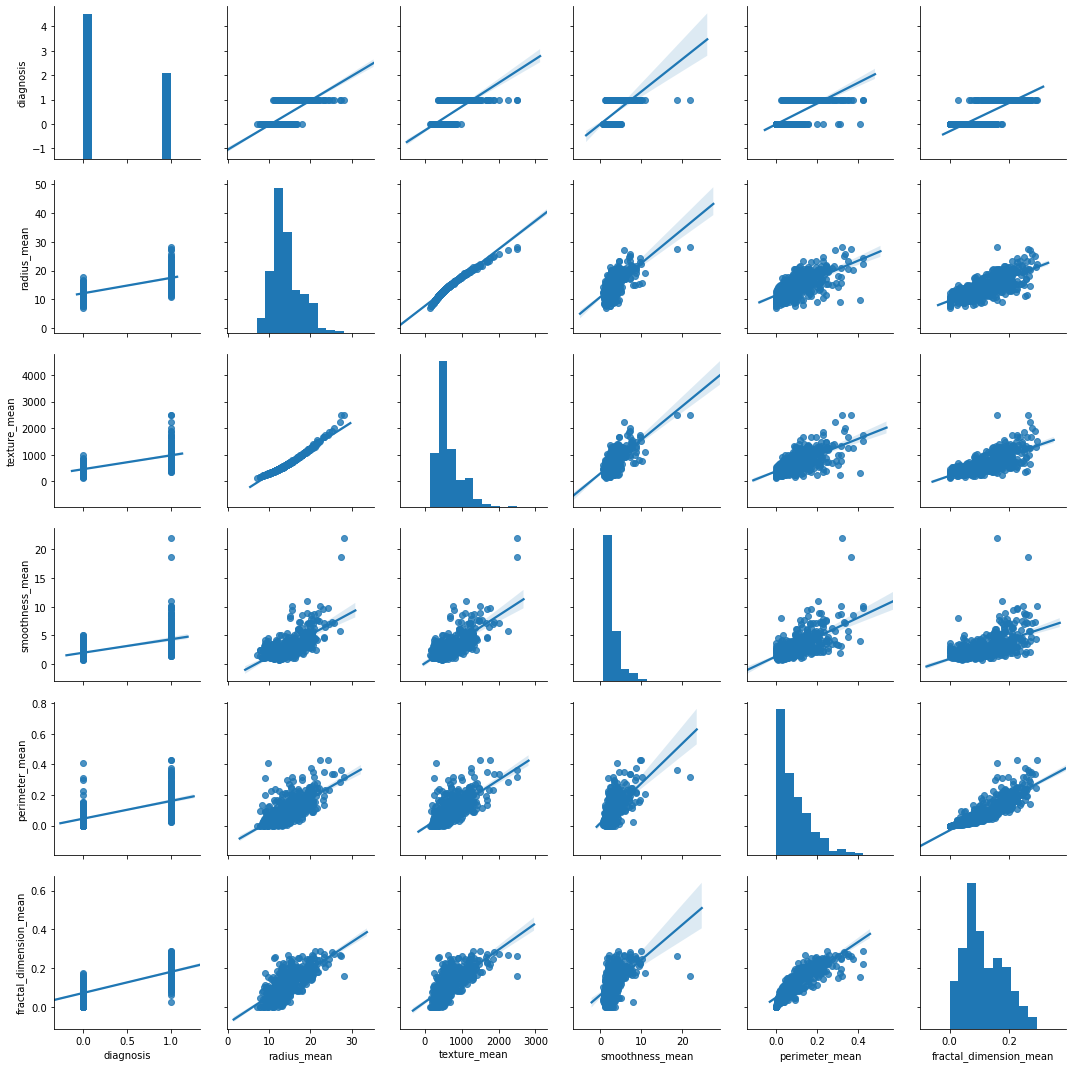

In [20]:
# Finding the correlation of imoprtant variables with each other using pairplot regression kind
dataImpVariables = data[["diagnosis",
"radius_mean",                   
"texture_mean",
"smoothness_mean",                   
"perimeter_mean",
"fractal_dimension_mean"
]]
# with regression
sns.pairplot(dataImpVariables, kind="reg")
plt.show()

From pairplot, texture properties are tangential with other properties hence has no impact on the target outcome. We can remove it from the important variable.

Boxplot on smoothness


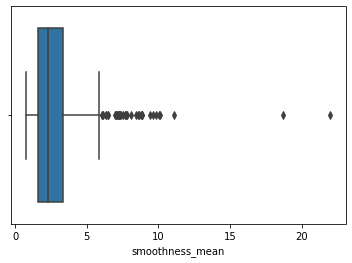

In [21]:
# boxplot for smoothness to find the outlier
print("Boxplot on smoothness")
sns.boxplot(x=data["smoothness_mean"])

Boxplot on radius


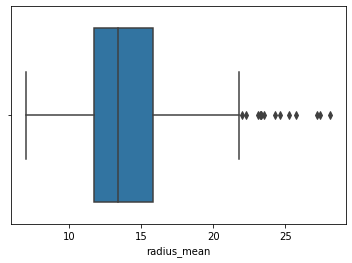

In [22]:
# boxplot for radius to find the outlier
print("Boxplot on radius")
sns.boxplot(x=data["radius_mean"])

Boxplot on perimeter


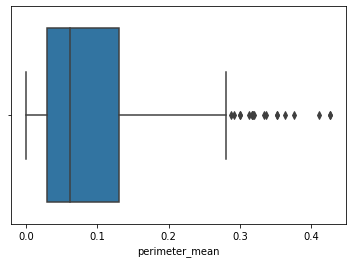

In [23]:
# boxplot for perimeter to find the outlier
print("Boxplot on perimeter")
sns.boxplot(x=data["perimeter_mean"])

Boxplot on fractal_dimension_mean


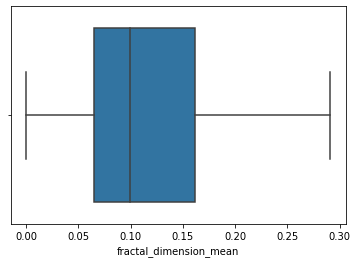

In [24]:
# boxplot for fractal_dimension to find the outlier
print("Boxplot on fractal_dimension_mean")
sns.boxplot(x=data["fractal_dimension_mean"])

There are more outlier found for the below properties;
1. radius_mean
2. smoothness_mean                  
3. perimeter_mean

In [25]:
# Load stats from scipy
from scipy import stats
# Load the numpy libraries with alias 'np' 
import numpy as np

# calculate zScore to remove the outliers
z = np.abs(stats.zscore(data))
print(z)

[[0.23640517 1.29767572 1.09706398 ... 2.29607613 2.75062224 1.93701461]
 [0.23640344 1.29767572 1.82982061 ... 1.0870843  0.24388967 0.28118999]
 [0.43174109 1.29767572 1.57988811 ... 1.95500035 1.152255   0.20139121]
 ...
 [0.23572747 1.29767572 0.70228425 ... 0.41406869 1.10454895 0.31840916]
 [0.23572517 1.29767572 1.83834103 ... 2.28998549 1.91908301 2.21963528]
 [0.24240586 0.77060855 1.80840125 ... 1.74506282 0.04813821 0.75120669]]


In [26]:
# Remove the outlier from the give dataframe if the zScore is > 3
dataAftrOutlierRemoved = data[(z < 3).all(axis=1)]
# shape of dataframe before removable of outlier
data.shape

(569, 32)

In [27]:
# shape of dataframe after removable of outlier
dataAftrOutlierRemoved.shape

(487, 32)

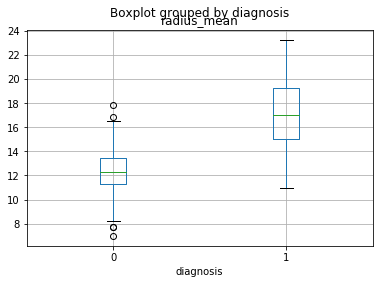

In [28]:
# compare the boxplot of radius for benign (0) and malignant (1)
dataAftrOutlierRemoved.boxplot(column=['radius_mean'], by='diagnosis')

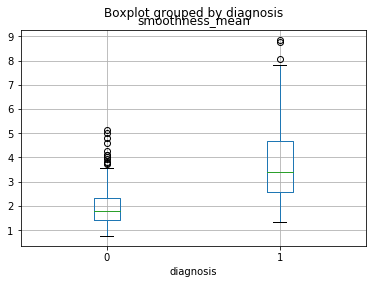

In [29]:
# compare the boxplot of smoothness for benign (0) and malignant (1)
dataAftrOutlierRemoved.boxplot(column=['smoothness_mean'], by='diagnosis')

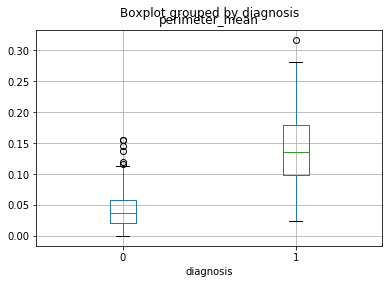

In [30]:
# compare the boxplot of perimeter for benign (0) and malignant (1)
dataAftrOutlierRemoved.boxplot(column=['perimeter_mean'], by='diagnosis')

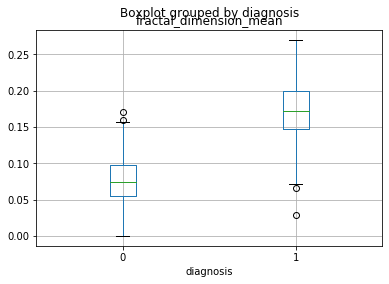

In [31]:
# compare the boxplot of fractal_dimension for benign (0) and malignant (1)
dataAftrOutlierRemoved.boxplot(column=['fractal_dimension_mean'], by='diagnosis')

Following are the important features identified for the model building from above Exploratory Data Analysis;
1. radius_mean
2. smoothness_mean
3. perimeter_mean
4. fractal_dimension_mean

#Modeling

#1. Logistic Regression classification technique

In [32]:
# To overcome imbalance classifications use Synthetic Minority Oversampling Technique (SMOTE)
# Load LogisticRegression, train_test_split from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Load SMOTE from imblearn
from imblearn.over_sampling import SMOTE

# Build a feature axis
X = dataAftrOutlierRemoved.loc[:, dataAftrOutlierRemoved.columns != "diagnosis"]
# Build a target axis
y = dataAftrOutlierRemoved.loc[:, "diagnosis"]


os = SMOTE(random_state=0)

# Split the dataframe 70% train and 30% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

# Performe over sampling using SMOTE on training data
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=["diagnosis"])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of benign sample in oversampled data",len(os_data_y[os_data_y["diagnosis"]==0]))
print("Number of malignant sample in oversampled data",len(os_data_y[os_data_y["diagnosis"]==1]))
print("Proportion of benign data in oversampled data is ",len(os_data_y[os_data_y["diagnosis"]==0])/len(os_data_X))
print("Proportion of malignant sample in oversampled data is ",len(os_data_y[os_data_y["diagnosis"]==1])/len(os_data_X))


length of oversampled data is  448
Number of benign sample in oversampled data 224
Number of malignant sample in oversampled data 224
Proportion of benign data in oversampled data is  0.5
Proportion of malignant sample in oversampled data is  0.5


In [33]:
# Find the quality of the selected features using Recursive Feature Elimination (RFE) 
data_final_vars=dataAftrOutlierRemoved.columns.values.tolist()
y=["diagnosis"]
X=[i for i in data_final_vars if i not in y]

# Load RFE from sklearn
from sklearn.feature_selection import RFE

logreg = LogisticRegression(max_iter=10000)
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True False False  True  True  True  True False  True
  True  True  True False False  True False False False  True  True  True
 False  True  True  True  True  True False]
[ 4  1  1  1  2  7  1  1  1  1 12  1  1  1  1 11  6  1  8  9 10  1  1  1
  3  1  1  1  1  1  5]


 From RFE and Exploratory Data Analysis, selected features are the best to detect the target outcome

In [34]:
# Build the Logistic Regression model with the selected features
features=["radius_mean",                   
"smoothness_mean",                   
"perimeter_mean",
"fractal_dimension_mean"] 
X=os_data_X[features]
y=os_data_y["diagnosis"]

In [35]:
# Load statsmodels.api libraries with alias sm
import statsmodels.api as sm

# Get the fitness of Logistic Regression model
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.308014
         Iterations 8
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.556     
Dependent Variable:    diagnosis         AIC:               283.9803  
Date:                  2020-01-31 02:42  BIC:               300.3995  
No. Observations:      448               Log-Likelihood:    -137.99   
Df Model:              3                 LL-Null:           -310.53   
Df Residuals:          444               LLR p-value:       1.7341e-74
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        8.0000                                         
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
radius_mean            -0.5445   0.0597 -9.1221 0.0000 -0.6615 -0.4275
smo

In [36]:
# Load metrics from sklearn
from sklearn import metrics

# Logistic Regression Model with important features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# Run the model to predicted outcome for the test data
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [38]:
# Load confusion_matrix from sklearn
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the model
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[66  4]
 [10 55]]


confusion matrix stats that out of 135 test data (66+55) 121 are predicted correctly

In [39]:
# Load classification_report from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        70
           1       0.93      0.85      0.89        65

    accuracy                           0.90       135
   macro avg       0.90      0.89      0.90       135
weighted avg       0.90      0.90      0.90       135



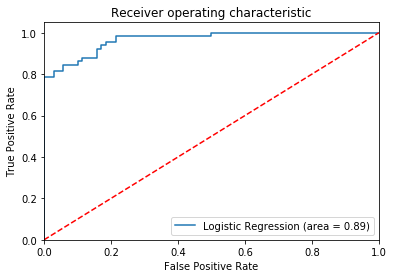

In [40]:
# Load roc_auc_score from sklearn
from sklearn.metrics import roc_auc_score
# Load roc_curve from sklearn
from sklearn.metrics import roc_curve

# Generate the ROC curve to find the fitness of the model
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#2. Random Forest classification technique

In [41]:
# Load RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Build the Random Forest model with the selected features
features=["radius_mean",                   
"smoothness_mean",                   
"perimeter_mean",
"fractal_dimension_mean"] 
X=os_data_X[features]
y=os_data_y["diagnosis"]

# Split the dataframe 70% train and 30% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
randomFrstclsfr = RandomForestClassifier(n_estimators=70, max_features = None, min_samples_leaf=30)
randomFrstclsfr.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
# Run the model to predicted outcome for the test data
y_pred = randomFrstclsfr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9185185185185185


In [43]:
# Convert the selected features into series using panda library
featureSeries = pd.Series(randomFrstclsfr.feature_importances_,index=features).sort_values(ascending=False)
featureSeries

fractal_dimension_mean    0.834652
perimeter_mean            0.121661
radius_mean               0.034695
smoothness_mean           0.008993
dtype: float64

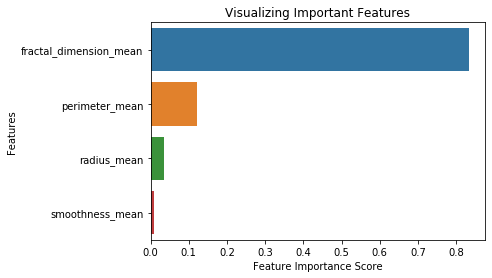

In [44]:
# Generate the feature importance score for Random Forest model
%matplotlib inline
# Creating a bar plot
sns.barplot(x=featureSeries, y=featureSeries.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [45]:
# Tune the model with different hyper parameter values
randomFrstclsfr = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1, random_state=101, max_features=None)
randomFrstclsfr.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=101, verbose=0,
                       warm_start=False)

In [46]:
# Run the model to predicted outcome for the test data after tuning the hyper parameter
y_pred = randomFrstclsfr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9259259259259259
